#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*  Rodrigo Rodriguez Rodriguez A1183284
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [226]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

from sklearn.dummy import DummyClassifier

from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score

from sklearn import svm

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import RocCurveDisplay
from scipy.stats import gmean
import warnings
from numpy import arange #devuelve un objeto ndarray que contiene valores espaciados uniformemente dentro de un intervalo definido
from numpy import argmax #devuelve el índice del elemento máximo en una matriz

#**Ejercicio-1.** 

1. Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.

In [227]:
#hacemos que el Df jale de forma Local
df = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat",
                   sep=' ',index_col=None,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [228]:
#Cambiamos el nombre de las columnas  ya que definimos el Header y el index
df.rename(columns={0:'A1',1:'A2',2:'A3',3:'A4',4:'A5',5:'A6',6:'A7',7:'A8',
            8:'A9',9:'A10',10:'A11',11:'A12',12:'A13',13:'A14',14:'A15'},inplace=True)

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


**Análisis de las variables**
-- A1:	0,1    CATEGORICAL (a,b)
-- A2:	CONTINUA
-- A3:	CONTINUA
-- A4:	1,2,3  CATEGORICAL (p,g,gg)
-- A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL (ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
-- A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL (ff,dd,j,bb,v,n,o,h,z)
-- A7:	CONTINUA
-- A8:	1, 0    CATEGORICAL (True,False)
-- A9: 1, 0	    CATEGORICAL (True,False)
-- A10: CONTINUA
-- A11:  1, 0	    CATEGORICAL (True,False)
-- A12:    1, 2, 3    CATEGORICAL (s,g,p)
-- A13: CONTINUA
-- A14: CONTINUA
-- A15:   1,2 (1 , 2 ) variable de salids =y

In [229]:
# Se asignan las variables de entrada y de salida

Y = df['A15']
X = df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']]
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


In [230]:
# Se hace la partición solicitada con 15% de prueba

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.15, shuffle=True, random_state=0)

print('Tamaño del conjunto de entrenamiento:', Xtrain.shape)
print('Tamaño del conjunto de prueba', Xtest.shape)

print('Tamaño del conjunto de entrenamiento:', Ytrain.shape)
print('Tamaño del conjunto de prueba', Ytest.shape)

Tamaño del conjunto de entrenamiento: (586, 14)
Tamaño del conjunto de prueba (104, 14)
Tamaño del conjunto de entrenamiento: (586,)
Tamaño del conjunto de prueba (104,)


In [231]:
# Se comprueba que no haya valores nulos

sindata = df.isnull()
for column in sindata.columns.values.tolist():
    print(column)
    print (sindata[column].value_counts())
    print("")  

A1
False    690
Name: A1, dtype: int64

A2
False    690
Name: A2, dtype: int64

A3
False    690
Name: A3, dtype: int64

A4
False    690
Name: A4, dtype: int64

A5
False    690
Name: A5, dtype: int64

A6
False    690
Name: A6, dtype: int64

A7
False    690
Name: A7, dtype: int64

A8
False    690
Name: A8, dtype: int64

A9
False    690
Name: A9, dtype: int64

A10
False    690
Name: A10, dtype: int64

A11
False    690
Name: A11, dtype: int64

A12
False    690
Name: A12, dtype: int64

A13
False    690
Name: A13, dtype: int64

A14
False    690
Name: A14, dtype: int64

A15
False    690
Name: A15, dtype: int64



#**Ejercicio-2.**

2. Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.

In [232]:
# Se procede a crear el Pipe para reemplazar los valores faltantes y escalar

# Numéricos de entrada:
df_num_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), 
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])  
df_num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Tipo categórico
df_cat_pipeline = Pipeline(steps = [('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 
df_cat_pipeline_nombres = ['A1','A4','A5','A6','A8','A9','A11','A12']



CT = ColumnTransformer(transformers = [('df_numericas_pipe', df_num_pipeline, df_num_pipeline_nombres),
                                      ('df_categoricas_pipe', df_cat_pipeline, df_cat_pipeline_nombres),
                                      ])

#**Ejercicio-3.**

3. Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

In [233]:
modeloDummy = DummyClassifier(strategy='stratified')    # Inicializamos el modelo Dummy con el crierio de 
                                                           # predecir siempre con el valor de la clase de mayor frecuencia. 

modeloDummy.fit(Xtrain, Ytrain)       # entrenamos con los conjuntos de entrenamiento

Yhat = modeloDummy.predict(Xtest) 
Yhat2 = modeloDummy.predict(Xtrain)


print("El valor de f1 para prueba es:",f1_score(Ytest,Yhat))
print("El valor de f1 para entrenamiento es:",f1_score(Ytrain,Yhat2),'\n')

print("El valor de recall para prueba es:",recall_score(Ytest,Yhat))
print("El valor de recall para entrenamiento es:",recall_score(Ytrain,Yhat2),'\n')

print("El valor de precision para prueba es:",precision_score(Ytest,Yhat))
print("El valor de precision para entrenamiento es:",precision_score(Ytrain,Yhat2),'\n')

print("El valor de accuracy para prueba es:",accuracy_score(Ytest,Yhat))
print("El valor de accuracy para entrenamiento es:",accuracy_score(Ytrain,Yhat2),'\n')

El valor de f1 para prueba es: 0.43010752688172044
El valor de f1 para entrenamiento es: 0.4630350194552529 

El valor de recall para prueba es: 0.43478260869565216
El valor de recall para entrenamiento es: 0.4559386973180077 

El valor de precision para prueba es: 0.425531914893617
El valor de precision para entrenamiento es: 0.47035573122529645 

El valor de accuracy para prueba es: 0.49038461538461536
El valor de accuracy para entrenamiento es: 0.5290102389078498 



#**Ejercicio-4.**

4. Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.


In [234]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(svm.SVC())
  nombres.append('SVC')


  return modelos, nombres

In [235]:
def do_grid_search(modela, X, y, cv, dicc_grid, scoring = 'accuracy'):
    
  
        grid_pipe = Pipeline(steps = [
            ('CT', CT),
            ('modela', modela)
            ])
        
      
        #Creamos el grid
        grid = GridSearchCV(
            estimator= grid_pipe, cv=cv,
            param_grid=dicc_grid, scoring=scoring, n_jobs=-1)


        grid.fit(X, y.values.ravel())

        #Imprimimos resultados
        print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
        print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
        print('Métrica utilizada:', grid.scoring)

        return grid

In [236]:
dicc_grid = {"modela__kernel":['linear', 'poly', 'rbf', 'sigmoid'],
             "modela__C": np.linspace(1,12,20),
             "modela__gamma":[np.linspace(0.000000001,0.02,10),"scale","auto"],
             "modela__break_ties":[True,False],
             "modela__degree":np.linspace(1,10,5,dtype=int),
             "modela__class_weight":['balanced',None]}

In [237]:
modelos, nombres = get_models() 
Kfold = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)



grid_SVC_f1 = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(f1_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.850867929146754
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 10.263157894736842, 'modela__break_ties': True, 'modela__class_weight': 'balanced', 'modela__degree': 3, 'modela__gamma': 'auto', 'modela__kernel': 'poly'}
Métrica utilizada: make_scorer(f1_score)


In [238]:
modelos, nombres = get_models()
Kfold = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)



grid_SVC_precision = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(precision_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8486824659237135
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 2.1578947368421053, 'modela__break_ties': True, 'modela__class_weight': None, 'modela__degree': 7, 'modela__gamma': 'auto', 'modela__kernel': 'poly'}
Métrica utilizada: make_scorer(precision_score)


In [239]:
modelos, nombres = get_models()
Kfold = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)



grid_SVC_acuraccy = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(accuracy_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8606401534972963
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 2.1578947368421053, 'modela__break_ties': True, 'modela__class_weight': None, 'modela__degree': 7, 'modela__gamma': 'auto', 'modela__kernel': 'poly'}
Métrica utilizada: make_scorer(accuracy_score)


In [240]:
modelos, nombres = get_models()
Kfold = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)


grid_SVC_recall= do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(recall_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.9388958379791694
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 1.5789473684210527, 'modela__break_ties': True, 'modela__class_weight': 'balanced', 'modela__degree': 3, 'modela__gamma': 'auto', 'modela__kernel': 'poly'}
Métrica utilizada: make_scorer(recall_score)


In [241]:
model_precision = svm.SVC(kernel=grid_SVC_precision.best_params_.get('modela__kernel'),
                C=grid_SVC_precision.best_params_.get('modela__C'),
                gamma=grid_SVC_precision.best_params_.get('modela__gamma'),
                break_ties=grid_SVC_precision.best_params_.get('modela__break_ties'),
                degree=grid_SVC_precision.best_params_.get("modela__degree"),
                class_weight=grid_SVC_precision.best_params_.get("modela__class_weight")
                )

In [242]:
model_F1= svm.SVC(kernel=grid_SVC_f1.best_params_.get('modela__kernel'),
                C=grid_SVC_f1.best_params_.get('modela__C'),
                gamma=grid_SVC_f1.best_params_.get('modela__gamma'),
                break_ties=grid_SVC_f1.best_params_.get('modela__break_ties'),
                degree=grid_SVC_f1.best_params_.get("modela__degree"),
                  class_weight=grid_SVC_f1.best_params_.get("modela__class_weight")
                )

In [243]:
model_accuracy =svm.SVC(kernel=grid_SVC_acuraccy.best_params_.get('modela__kernel'),
                C=grid_SVC_acuraccy.best_params_.get('modela__C'),
                gamma=grid_SVC_acuraccy.best_params_.get('modela__gamma'),
                break_ties=grid_SVC_acuraccy.best_params_.get('modela__break_ties'),
                degree=grid_SVC_acuraccy.best_params_.get("modela__degree"),
                        class_weight=grid_SVC_acuraccy.best_params_.get("modela__class_weight")
                )

In [244]:
model_recall= svm.SVC(kernel=grid_SVC_recall.best_params_.get('modela__kernel'),
                C=grid_SVC_recall.best_params_.get('modela__C'),
                gamma=grid_SVC_recall.best_params_.get('modela__gamma'),
                break_ties=grid_SVC_recall.best_params_.get('modela__break_ties'),
                degree=grid_SVC_recall.best_params_.get("modela__degree"),
                      class_weight=grid_SVC_recall.best_params_.get("modela__class_weight")
                )

In [245]:
model=model_recall

### De los resultados previos obtener el mejor entrenamiento el cual fue recall

In [246]:
Xtrain_Fit= CT.fit(Xtrain)
XtrainTransf= Xtrain_Fit.transform(Xtrain)

X_test_Fit= CT.fit(Xtest)
XtestTransf= X_test_Fit.transform(Xtest)

#obtenemos modelos para Y
model_recall.fit(XtrainTransf, Ytrain)


Yhat_SVC = model_recall.predict(XtestTransf)
Yhat2_SVC = model_recall.predict(XtrainTransf)
cm = confusion_matrix(Ytest, Yhat_SVC)


print("El valor de f1 para prueba es:",f1_score(Ytest,Yhat_SVC))
print("El valor de f1 para entrenamiento es:",f1_score(Ytrain,Yhat2_SVC),'\n')

print("El valor de recall para prueba es:",recall_score(Ytest,Yhat_SVC))
print("El valor de recall para entrenamiento es:",recall_score(Ytrain,Yhat2_SVC),'\n')

print("El valor de precision para prueba es:",precision_score(Ytest,Yhat_SVC))
print("El valor de precision para entrenamiento es:",precision_score(Ytrain,Yhat2_SVC),'\n')

print("El valor de accuracy para prueba es:",accuracy_score(Ytest,Yhat_SVC))
print("El valor de accuracy para entrenamiento es:",accuracy_score(Ytrain,Yhat2_SVC),'\n')

El valor de f1 para prueba es: 0.8695652173913043
El valor de f1 para entrenamiento es: 0.8492201039861352 

El valor de recall para prueba es: 0.8695652173913043
El valor de recall para entrenamiento es: 0.9386973180076629 

El valor de precision para prueba es: 0.8695652173913043
El valor de precision para entrenamiento es: 0.7753164556962026 

El valor de accuracy para prueba es: 0.8846153846153846
El valor de accuracy para entrenamiento es: 0.8515358361774744 



#**Ejercicio-5.**
Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas.
Incluye tus conclusiones.

In [247]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [248]:
Metricas=list()
Metricas.append('F1')
Metricas.append('Recall')
Metricas.append('Precision')
Metricas.append('Accuracy')

In [249]:
Test=list()
Test.append(diagramas(f1_score(Ytest,Yhat_SVC)))
Test.append(diagramas(recall_score(Ytest,Yhat_SVC)))
Test.append(diagramas(precision_score(Ytest,Yhat_SVC)))
Test.append(diagramas(accuracy_score(Ytest,Yhat_SVC)))

Train=list()
Train.append(diagramas(f1_score(Ytrain,Yhat2_SVC)))
Train.append(diagramas(recall_score(Ytrain,Yhat2_SVC)))
Train.append(diagramas(precision_score(Ytrain,Yhat2_SVC)))
Train.append(diagramas(accuracy_score(Ytrain,Yhat2_SVC)))

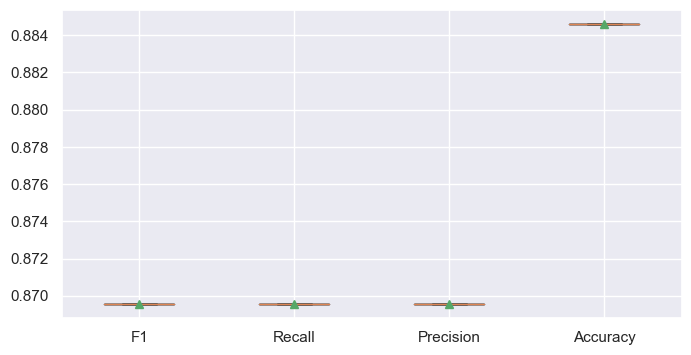

In [250]:
sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(Test, labels=Metricas, showmeans=True)
plt.show()

#**Ejercicio-6.**

In [251]:
def mi_ModeloYCurvas(Xin,score):


       modelo = model
       mi_pipe = Pipeline(steps = [
            ('CT', CT),
            ('model', model)
            ])

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)


       delta_train_sz = np.linspace(0.1, 1.0, num=40)


       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,
                                                        X = Xin,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=0,
                                                        scoring=score)

       # Obtenemos el gráfico con las curvas de aprendizaje:
       z=mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,score)
       return z

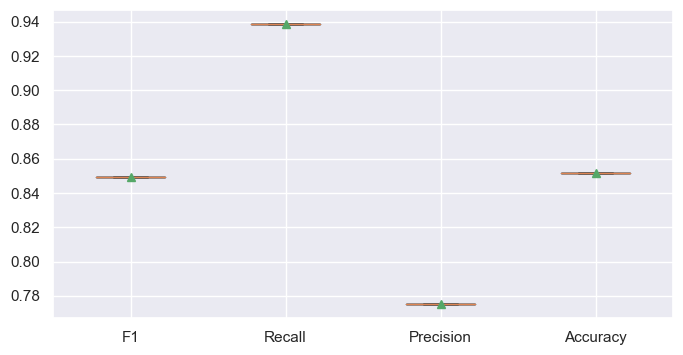

In [252]:
plt.boxplot(Train, labels=Metricas, showmeans=True)
plt.show()

In [253]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,score):


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')


    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

    return train_mean

In [254]:
warnings.filterwarnings('ignore')

Curvas de aprendizaje del modelo SVM con Accuracy:


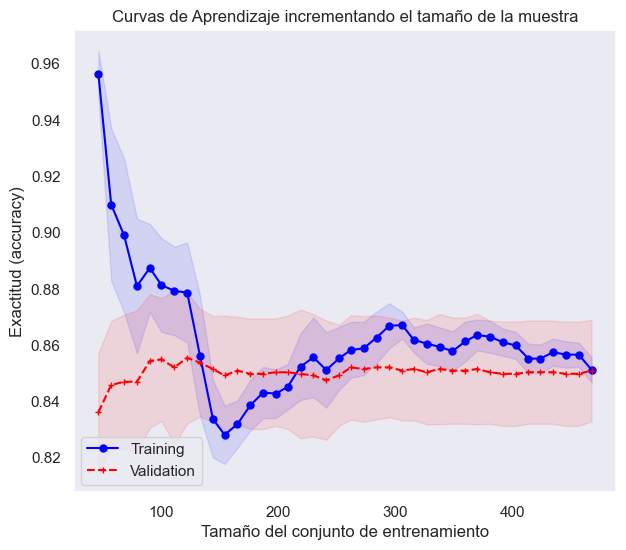

Curvas de aprendizaje del modelo SVM con F1:


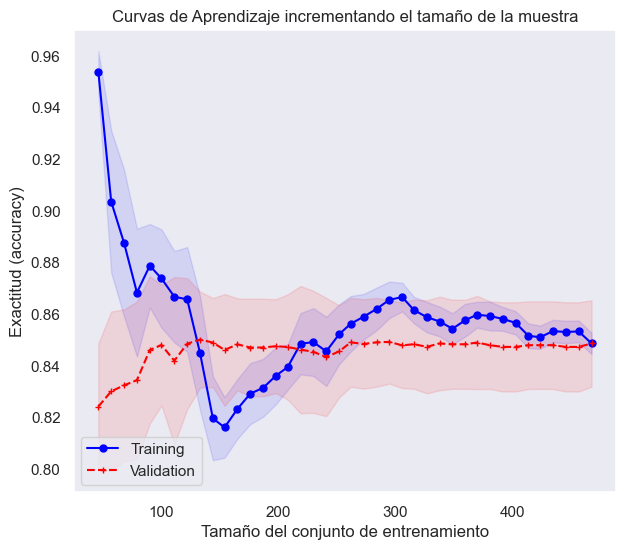

Curvas de aprendizaje del modelo SVM con Recall:


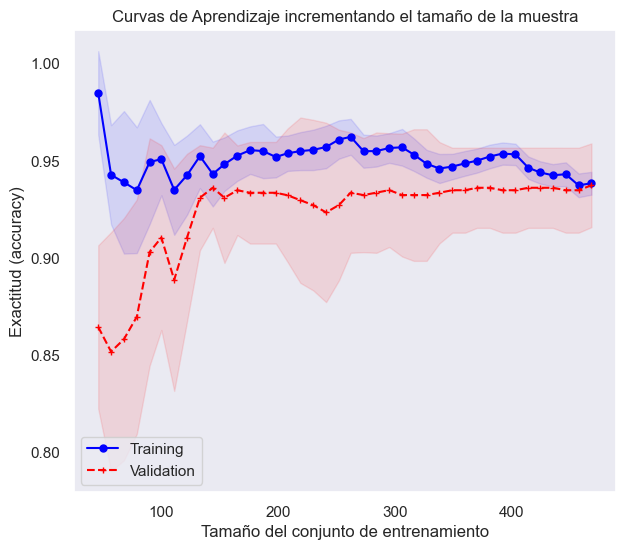

Curvas de aprendizaje del modelo SVM con Precision:


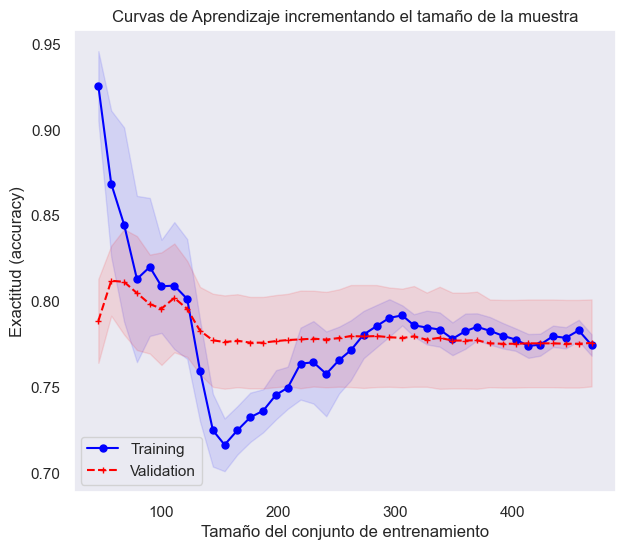

In [255]:
boxplotlist=list()
print('Curvas de aprendizaje del modelo SVM con Accuracy:')
a=mi_ModeloYCurvas(Xtrain,make_scorer(accuracy_score))
boxplotlist.append(a)
print('Curvas de aprendizaje del modelo SVM con F1:')
b=mi_ModeloYCurvas(Xtrain,make_scorer(f1_score))
boxplotlist.append(b)
print('Curvas de aprendizaje del modelo SVM con Recall:')
c=mi_ModeloYCurvas(Xtrain,make_scorer(recall_score))
boxplotlist.append(c)
print('Curvas de aprendizaje del modelo SVM con Precision:')
d=mi_ModeloYCurvas(Xtrain,make_scorer(precision_score))
boxplotlist.append(d)

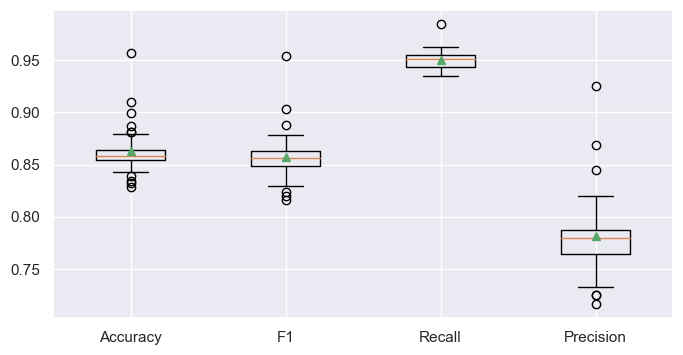

In [256]:
plt.boxplot(boxplotlist, labels=['Accuracy','F1','Recall','Precision'], showmeans=True)
plt.show()

#**Ejercicio-7.**

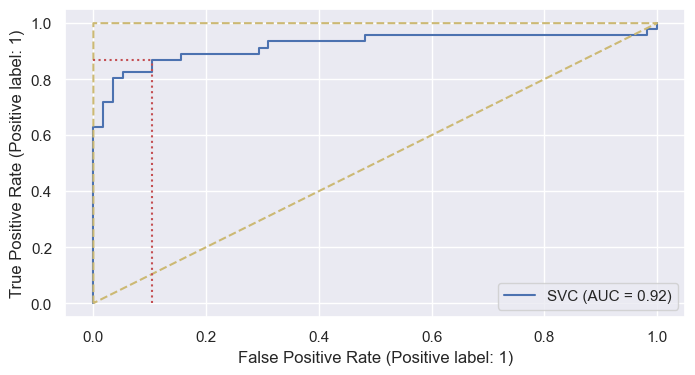

In [257]:
TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])
RocCurveDisplay.from_estimator(model, XtestTransf, Ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')
plt.show()

#**Ejercicio-8.**

In [258]:

grid_SVC2 = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(f1_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.850867929146754
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 10.263157894736842, 'modela__break_ties': True, 'modela__class_weight': 'balanced', 'modela__degree': 3, 'modela__gamma': 'auto', 'modela__kernel': 'poly'}
Métrica utilizada: make_scorer(f1_score)


In [259]:
model = svm.SVC(kernel=grid_SVC2.best_params_.get('modela__kernel'),
                C=grid_SVC2.best_params_.get('modela__C'),
                gamma=grid_SVC2.best_params_.get('modela__gamma'),
                break_ties=grid_SVC2.best_params_.get('modela__break_ties'),
                degree=grid_SVC2.best_params_.get("modela__degree")
                , class_weight=grid_SVC2.best_params_.get("modela__class_weight"),
                probability=True
                )

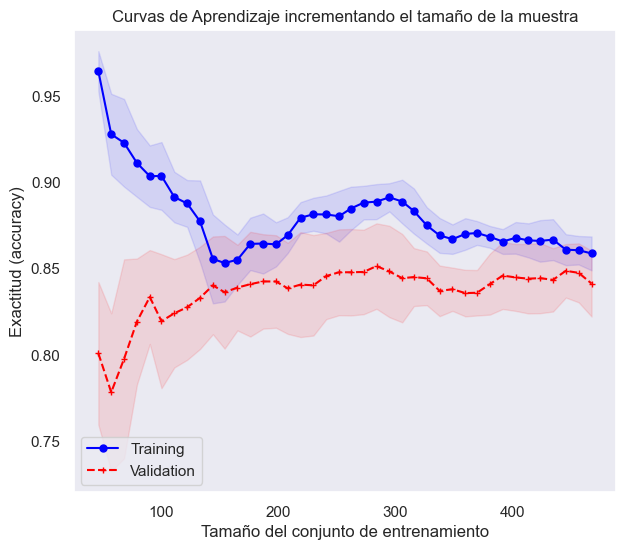

In [260]:
mi_ModeloYCurvas(Xtrain,make_scorer(f1_score))
plt.show()

In [261]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [262]:
Xtrain_Fit= CT.fit(Xtrain)
XtrainTransf= Xtrain_Fit.transform(Xtrain)

X_test_Fit= CT.fit(Xtest)
XtestTransf= X_test_Fit.transform(Xtest)

#obtenemos modelos para Y
model.fit(XtrainTransf, Ytrain)

SVC(C=10.263157894736842, break_ties=True, class_weight='balanced',
    gamma='auto', kernel='poly', probability=True)

In [263]:
#Se hace la predicción
yhat_THR = model.predict_proba(XtestTransf)
#Maniente las probabilidades de la parte positiva
probs = yhat_THR[:, 1]
#Se definen los Thresholds (valores que van de 0-1)
thresholds = arange(0, 1, 0.001)
# evaluate each threshold

In [264]:
#Función para calcular el umbral con la métrica F1-Score
scoreFS = [f1_score(Ytest, to_labels(probs, t)) for t in thresholds]
#Se obtiene el mejor umbral
ix = argmax(scoreFS)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scoreFS[ix]))

Threshold=0.781, F-Score=0.88372


#**Ejercicio-9.**

In [265]:
grid_SVC3 = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid,
                          make_scorer(geometric_mean_score))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8604445534373012
Mejor combinación de valores encontrados de los hiperparámetros: {'modela__C': 2.1578947368421053, 'modela__break_ties': True, 'modela__class_weight': 'balanced', 'modela__degree': 1, 'modela__gamma': 'scale', 'modela__kernel': 'rbf'}
Métrica utilizada: make_scorer(geometric_mean_score)


In [266]:
model = svm.SVC(kernel=grid_SVC3.best_params_.get('modela__kernel'),
                C=grid_SVC3.best_params_.get('modela__C'),
                gamma=grid_SVC3.best_params_.get('modela__gamma'),
                 break_ties=grid_SVC3.best_params_.get('modela__break_ties'),
                degree=grid_SVC2.best_params_.get("modela__degree")
                ,class_weight=grid_SVC3.best_params_.get("modela__class_weight")
                )

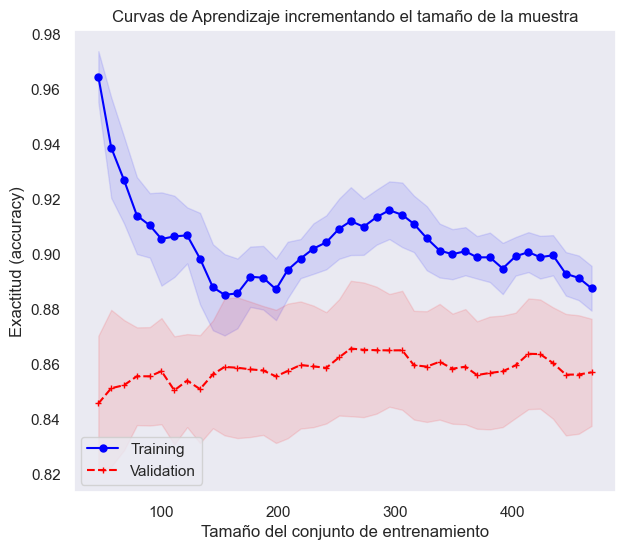

In [267]:
mi_ModeloYCurvas(Xtrain,make_scorer(geometric_mean_score))
plt.show()

In [268]:
#Función para calcular el umbral con la métrica G-mean
scoreGM = [geometric_mean_score(Ytest, to_labels(probs, t)) for t in thresholds]
#Se obtiene el mejor umbral
ix = argmax(scoreGM)
print('Threshold=%.3f, Gmean=%.5f' % (thresholds[ix], scoreGM[ix]))

Threshold=0.152, Gmean=0.89392


#**Ejercicio-10.**
Incluye tus conclusiones finales de la actividad.

In [269]:
None

###**Fin de la Actividad de la semana 8.**